####  Case study 2
#### Hackathon 
##### - Shantam Bhuraria 
##### - 0697


In [1]:
# importing libraries for data preprocessing 

In [2]:
import pandas as pd 
import numpy as np 
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

##### Importing data , train , test ,data_description file 

In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
df_desc=pd.read_csv('Data Description.csv')

In [4]:
train_df.head()

,customerid,revised_net_salary,total_loans,tot_live,avg_tenure_closed,num_live_AL,num_closed_AL,sum_sanc_live_AL,max_sanc_live_AL,min_sanc_live_AL,...,tot_sanc_2012_PL_CL,tot_sanc_2013_PL_CL,tot_sanc_2014_PL_CL,tot_sanc_2015_PL_CL,tot_sanc_2016_PL_CL,overall_elite_flag,marital_status,dimcity_name,dimage,residencetype
0,IN_SN_1,42375.0,7.0,4.0,428.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MARRIED,PUNE,29.0,OWNED
1,IN_SN_2,60920.0,11.0,7.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1423000.0,1423000.0,1423000.0,NaN,NaN,NaN,MARRIED,KOLKATA,32.0,RENTED
2,IN_SN_3,70640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MARRIED,NAGPUR,37.0,OWNED
3,IN_SN_4,22090.0,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MARRIED,TULJAPUR,49.0,OTHERS
4,IN_SN_5,61717.0,18.0,3.0,1526.0,NaN,1.0,NaN,NaN,NaN,...,4143086.0,4143086.0,4143086.0,4143086.0,NaN,NaN,MARRIED,PUNE,38.0,OWNED


In [5]:
test_df.head()

,customerid,total_loans,tot_live,avg_tenure_closed,num_live_AL,num_closed_AL,sum_sanc_live_AL,max_sanc_live_AL,min_sanc_live_AL,sum_bal_live_AL,...,tot_sanc_2012_PL_CL,tot_sanc_2013_PL_CL,tot_sanc_2014_PL_CL,tot_sanc_2015_PL_CL,tot_sanc_2016_PL_CL,overall_elite_flag,marital_status,dimcity_name,dimage,residencetype
0,IN_SN_81169,9.0,8.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4212151.0,NaN,NaN,0.0,MARRIED,HYDERABAD,32.0,RENTED
1,IN_SN_81170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,OTHERS,NaN,NaN,OTHERS
2,IN_SN_81171,2.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,MARRIED,COIMBATORE,39.0,RENTED
3,IN_SN_81172,8.0,6.0,NaN,1.0,0.0,330000.0,330000.0,330000.0,305444.0,...,NaN,NaN,2634666.0,NaN,NaN,NaN,MARRIED,PUNE,31.0,OWNED
4,IN_SN_81173,5.0,4.0,283.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,365450.0,NaN,NaN,NaN,MARRIED,CHANDIGARH,41.0,RENTED


####  Target Variable is ' revised_net_salary '

In [6]:
df_desc.head()

,Column name,Description
0,customerid,ID of the customer
1,revised_net_salary(y),Target variable: Salary of the individual
2,total_loans,Total number of loan availed
3,tot_live,Total number of loans live(Yet to settle)
4,avg_tenure_closed,Average of the time it took the person to clo...


In [4]:
# Check columns
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81168 entries, 0 to 81167
Data columns (total 222 columns):
customerid               object
revised_net_salary       float64
total_loans              float64
tot_live                 float64
avg_tenure_closed        float64
num_live_AL              float64
num_closed_AL            float64
sum_sanc_live_AL         float64
max_sanc_live_AL         float64
min_sanc_live_AL         float64
sum_bal_live_AL          float64
max_bal_live_AL          float64
min_bal_live_AL          float64
sum_sanc_closed_AL       float64
max_sanc_closed_AL       float64
min_sanc_closed_AL       float64
sum_bal_closed_AL        float64
max_bal_closed_AL        float64
min_bal_closed_AL        float64
num_2004_live_AL         float64
num_2005_live_AL         float64
num_2006_live_AL         float64
num_2007_live_AL         float64
num_2008_live_AL         float64
num_2009_live_AL         float64
num_2010_live_AL         float64
num_2011_live_AL         float64


In [5]:
# checking for duplicate values
dups=train_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


#### Finding the missing values and removing the coulmn if the percentage is greater than 30%

In [6]:
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
# adding the missing percentage along with the column in new data frame
missing_value_df = pd.DataFrame({'column_name': train_df.columns,
                                 'percent_missing': percent_missing})

In [7]:
missing_value_df.head()

,column_name,percent_missing
customerid,customerid,0.000000
revised_net_salary,revised_net_salary,0.000000
total_loans,total_loans,6.551843
tot_live,tot_live,6.551843
avg_tenure_closed,avg_tenure_closed,44.367238


In [8]:
# Getting column list where the missing values are greater than 30%
column_list=[]
for i, j in missing_value_df.iterrows():
    if j.percent_missing>30 :
        column_list.append(j.column_name)
    else: 
        continue
    

####  Removing the column values whose values are greater than 30 %

In [9]:
train_df.drop(column_list,axis=1,inplace=True)

test_df.drop(column_list,axis=1,inplace=True)

#### Filling the null values 

In [10]:
# filling null values 
# train dataset 
for i in train_df.columns:
    if(train_df[i].dtypes =='object'):
        train_df[i].fillna(train_df[i].mode()[0],inplace=True)
        
    else:
        train_df[i].fillna(int(train_df[i].mean()),inplace=True)


In [11]:
# filling null values
# test data set 
for i in test_df.columns:
    if(test_df[i].dtypes =='object'):
        test_df[i].fillna(test_df[i].mode()[0],inplace=True)
    else:
        test_df[i].fillna(int(test_df[i].mean()),inplace=True)

In [12]:
# Checking for object data type column 
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81168 entries, 0 to 81167
Data columns (total 77 columns):
customerid               81168 non-null object
revised_net_salary       81168 non-null float64
total_loans              81168 non-null float64
tot_live                 81168 non-null float64
num_closed_AL            81168 non-null float64
num_2004_live_AL         81168 non-null float64
num_2005_live_AL         81168 non-null float64
num_2006_live_AL         81168 non-null float64
num_2007_live_AL         81168 non-null float64
num_2008_live_AL         81168 non-null float64
num_2009_live_AL         81168 non-null float64
num_2010_live_AL         81168 non-null float64
num_2011_live_AL         81168 non-null float64
num_2012_live_AL         81168 non-null float64
num_2013_live_AL         81168 non-null float64
num_2014_live_AL         81168 non-null float64
num_2015_live_AL         81168 non-null float64
num_2016_live_AL         81168 non-null float64
num_closed_BL            811

In [13]:
# dropping coustomer id and city name since there are multiple cities and creating a dummy or encoding them will just increase columns.
train_df.drop(['customerid','dimcity_name'],axis=1,inplace=True)

test_df.drop(['customerid','dimcity_name'],axis=1,inplace=True)

####  Defining the target variable Y 

In [14]:
y = train_df['revised_net_salary']
train_df.drop(['revised_net_salary'],axis=1,inplace=True) # droping the column from the final training data 

In [15]:
# Creating dummy variable for object datatype column 

In [16]:
for i in train_df.columns:
    if (train_df[i].dtype=='object'):
        print(i)

marital_status
residencetype


In [17]:
train_dummy = pd.get_dummies(train_df[['marital_status','residencetype']])
test_dummy = pd.get_dummies(test_df[['marital_status','residencetype']])

#### Checking for missing columns 

In [18]:
data_missing = set(train_dummy.columns)-set(test_dummy.columns)
data_missing

set()

#### removing all the columns having object data type and we have already created dummy for it 

In [19]:
train_df.drop(['marital_status','residencetype'],axis=1,inplace=True)
test_df.drop(['marital_status','residencetype'],axis=1,inplace=True)

In [20]:
final_train=pd.concat([train_df,train_dummy],axis=1)
final_test=pd.concat([test_df,test_dummy],axis=1)

In [21]:
print(final_train.shape)
print(final_test.shape)

(81168, 78)
(34786, 78)


In [22]:
# Final Summary of the data frame with missing values , Unique values and data type 

In [23]:
col_summary = pd.DataFrame(train_df.columns, columns = ['Column'])
na_list = []
unique_list = []
dtype_list = []

for col in train_df.columns:
    na_list.append(train_df[col].isna().sum())
    unique_list.append(train_df[col].nunique())
    dtype_list.append(train_df[col].dtype)
    
col_summary['Missing values'] = na_list
col_summary['Unique values'] = unique_list
col_summary['Data type'] = dtype_list
col_summary

,Column,Missing values,Unique values,Data type
0,total_loans,0,99,float64
1,tot_live,0,40,float64
2,num_closed_AL,0,14,float64
3,num_2004_live_AL,0,6,float64
4,num_2005_live_AL,0,6,float64
...,...,...,...,...
67,num_2013_live_PL_CL,0,16,float64
68,num_2014_live_PL_CL,0,18,float64
69,num_2015_live_PL_CL,0,13,float64
70,num_2016_live_PL_CL,0,6,float64


####  After finising the preprocessing we need to spit the dataset into train and test models 

##### Splitting the dataset

In [26]:
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, f1_score, plot_confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, roc_auc_score, roc_curve


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [28]:
x=final_train

In [29]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.4, random_state=0)

In [30]:
y_train.shape

(48700,)

In [31]:
import keras

In [45]:
from keras.models import Model
from keras.layers import Activation
from keras.layers import Dropout

In [55]:
X_train.shape

(48700, 78)

In [32]:
def create_model():
    model=Sequential()
    model.add(Dense(78,input_dim=78,kernel_initializer='normal',activation='relu'))
    model.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model.add(Dense(24,kernel_initializer='normal',activation='relu'))
    model.add(Dense(16,kernel_initializer='normal',activation='relu'))
    model.add(Dense(8,kernel_initializer='normal',activation='relu'))
    model.add(Dense(4,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,kernel_initializer='normal'))
    # Compile Model
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
    return model

In [33]:
X=np.array(X_train)
Y=np.array(y_train)

In [34]:
estimator=KerasRegressor(build_fn=create_model,epochs=30,batch_size=10,verbose=1)

In [35]:
history=estimator.fit(X,Y)

Epoch 1/30
4870/4870 [==============================] - 8s 1ms/step - loss: 2820453888.0000 - accuracy: 0.0000e+00
Epoch 2/30
4870/4870 [==============================] - 6s 1ms/step - loss: 2623602944.0000 - accuracy: 0.0000e+00
Epoch 3/30
4870/4870 [==============================] - 6s 1ms/step - loss: 2572055808.0000 - accuracy: 0.0000e+00
Epoch 4/30
4870/4870 [==============================] - 7s 1ms/step - loss: 2547543552.0000 - accuracy: 0.0000e+00
Epoch 5/30
4870/4870 [==============================] - 6s 1ms/step - loss: 2526151168.0000 - accuracy: 0.0000e+00
Epoch 6/30
4870/4870 [==============================] - 6s 1ms/step - loss: 2496923136.0000 - accuracy: 0.0000e+00
Epoch 7/30
4870/4870 [==============================] - 7s 1ms/step - loss: 2496103680.0000 - accuracy: 0.0000e+00
Epoch 8/30
4870/4870 [==============================] - 7s 1ms/step - loss: 2479454208.0000 - accuracy: 0.0000e+00
Epoch 9/30
4870/4870 [==============================] - 7s 1ms/step - loss: 2478

In [37]:
from sklearn.metrics import accuracy_score
prediction=estimator.predict(X_test)

3247/3247 [==============================] - 2s 677us/step


In [38]:
train_error =  np.abs(y_test - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

In [39]:
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)


std_error:  38984.46030743525
mean_error:  30989.78244405429
min_error:  2.14453125
max_error:  1264645.1875


In [40]:
import matplotlib.pyplot as plt

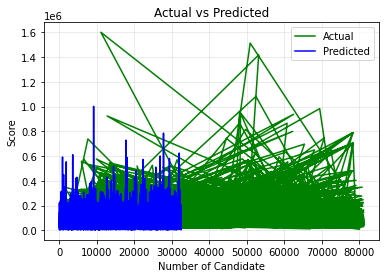

In [41]:
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [42]:
preds=estimator.predict(final_test)

3479/3479 [==============================] - 2s 687us/step


In [43]:
test= pd.read_csv('test.csv')


In [44]:
customerid = test['customerid']
output = pd.DataFrame(columns=['customerid','revised_net_salary'])

In [45]:
output['customerid'] = customerid
output['revised_net_salary'] = preds

output.to_csv('nn3.csv',index=False)

output

,customerid,revised_net_salary
0,IN_SN_81169,83320.875000
1,IN_SN_81170,50794.218750
2,IN_SN_81171,45161.332031
3,IN_SN_81172,48841.906250
4,IN_SN_81173,18899.943359
...,...,...
34781,IN_SN_115950,50105.457031
34782,IN_SN_115951,49945.542969
34783,IN_SN_115952,50238.468750
34784,IN_SN_115953,50408.863281


In [46]:
from sklearn.model_selection import StratifiedKFold

In [51]:
X_train.shape[1]

78

In [52]:
X=np.array(X_train)

0        42375.0
1        60920.0
2        70640.0
3        22090.0
4        61717.0
          ...   
81163    63224.0
81164    29718.0
81165    67542.0
81166    52506.0
81167    43897.0
Name: revised_net_salary, Length: 81168, dtype: float64

In [60]:
seed = 7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
x=np.array(x)
y=np.array(y)
for train, test in kfold.split(x, y):
  # create model
    model = Sequential()
    model.add(Dense(72, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model.add(Dense(24,kernel_initializer='normal',activation='relu'))
    model.add(Dense(16,kernel_initializer='normal',activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(x[train], y[train], epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(x[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

/home/shantam/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: 

In [ ]:
pred_1=model.predict(final_test)

In [ ]:
test= pd.read_csv('test.csv')
customerid = test['customerid']
output = pd.DataFrame(columns=['customerid','revised_net_salary'])
output['customerid'] = customerid
output['revised_net_salary'] = pred_1

output.to_csv('nn3.csv',index=False)

output